In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
seam_data = "../data/SEAM.csv"
welding_data = "../data/welding_general.csv"

seam_df = pd.read_csv(seam_data)
welding_df = pd.read_csv(welding_data)

In [5]:
seam_df

,Month,Machine,e1,e2,e3,Lt,La,e,P1,P2,tmin,LOC_TK,case,target
0,October,DW-IV-003,0.7,0.5,0.7,2.27,1.05,2.08,0.22,0.45,0.69,2TK,case1,1
1,October,DW-IV-003,1.0,0.5,0.7,2.00,1.98,1.23,0.39,0.52,0.69,2TK,case2,1
2,October,DW-IV-006,0.7,0.5,0.7,2.13,2.03,1.27,0.33,0.41,0.69,2TK,case1,1
3,October,DW-IV-006,1.0,0.5,0.7,2.17,2.03,1.48,0.42,0.63,0.69,2TK,case2,1
4,October,DW-SMST-005,0.7,0.5,0.7,2.20,2.11,1.08,0.30,0.33,0.69,2TK,case1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6681,January,DW-SMST-013,0.7,0.5,0.7,2.34,2.19,1.12,0.34,0.27,0.62,1TK,case1,1
6682,January,DW-SMST-020,0.7,0.5,0.7,2.34,2.21,1.17,0.32,0.35,0.62,1TK,case1,1
6683,January,DW-SMST-024,0.7,0.5,0.7,2.27,2.24,1.24,0.39,0.34,0.62,1TK,case1,1
6684,January,STX-02,0.7,0.5,0.7,2.49,2.31,1.24,0.31,0.39,0.66,1TK,case1,1


In [6]:
seam_df["Lt"] = seam_df.Lt.replace({'-':0})
seam_df["Lt"] = seam_df.Lt.astype("float")

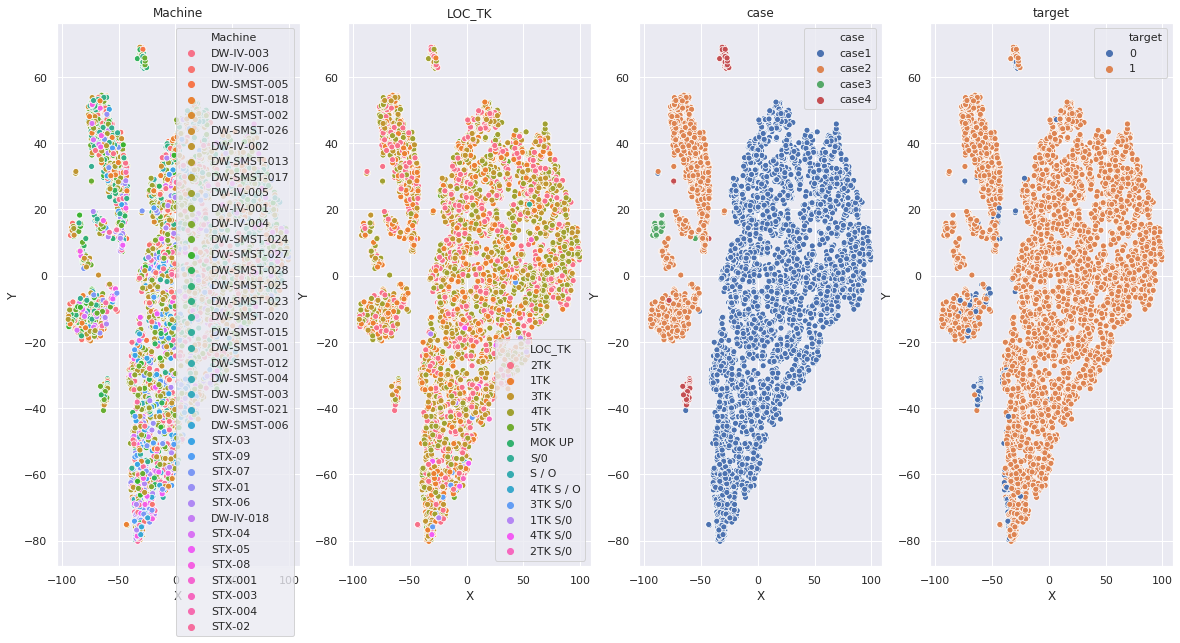

In [7]:
data = seam_df.values[:,2:11]
data_embedded = TSNE(n_components=2).fit_transform(data)
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, seam_df, left_index=True, right_index=True)

targets = ["Machine", "LOC_TK", "case", "target"]

f, axes = plt.subplots(1,4, figsize=(20, 10))
for i in range(4):
    sns.scatterplot(  y="Y", x= "X", data=embed_df,  hue=targets[i],ax=axes[i]) 
    ax = axes[i]
    ax.set_title(targets[i])


In [50]:
welding_df

,seq_id,dvc_id,timestamp,yyyymmdd,yyyymm,yyyy,mm,dd,id,type,...,amprs,vltg,send_speed,inter_temp,outer_temp,in_pwr_vltg,in_user,in_dt,up_user,up_dt
0,950554,ITM.WED_GBS031401,2019-04-24 08:00:01,20190424,201904,2019,4,24,GBS031401,PFC600ES_WELDER,...,0,0,0,23,25,442,DCC.Welding-3.TH-Subscriptions,00:01.0,NaN,NaN
1,950556,ITM.WED_GBS031404,2019-04-24 08:00:01,20190424,201904,2019,4,24,GBS031404,PFC600ES_WELDER,...,0,0,0,22,24,444,DCC.Welding-WD4.TH-Subscriptions,00:01.0,NaN,NaN
2,950555,ITM.WED_GBS031403,2019-04-24 08:00:01,20190424,201904,2019,4,24,GBS031403,PFC600ES_WELDER,...,0,0,0,23,25,450,DCC.Welding-WD3.TH-Subscriptions,00:01.0,NaN,NaN
3,950557,ITM.WED_GBS031402,2019-04-24 08:00:01,20190424,201904,2019,4,24,GBS031402,PFC600ES_WELDER,...,0,0,0,23,25,447,DCC.Welding-2.TH-Subscriptions,00:01.0,NaN,NaN
4,950565,ITM.WED_GBS031402,2019-04-24 08:00:02,20190424,201904,2019,4,24,GBS031402,PFC600ES_WELDER,...,0,0,0,23,25,447,DCC.Welding-2.TH-Subscriptions,00:02.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12099,971725,ITM.WED_GBS031402,2019-04-24 08:50:25,20190424,201904,2019,4,24,GBS031402,PFC600ES_WELDER,...,0,691,11,26,23,436,DCC.Welding-2.TH-Subscriptions,50:25.0,NaN,NaN
12100,971729,ITM.WED_GBS031401,2019-04-24 08:50:26,20190424,201904,2019,4,24,GBS031401,PFC600ES_WELDER,...,0,0,0,23,24,433,DCC.Welding-3.TH-Subscriptions,50:26.0,NaN,NaN
12101,971728,ITM.WED_GBS031404,2019-04-24 08:50:26,20190424,201904,2019,4,24,GBS031404,PFC600ES_WELDER,...,0,0,0,23,25,435,DCC.Welding-WD4.TH-Subscriptions,50:26.0,NaN,NaN
12102,971730,ITM.WED_GBS031403,2019-04-24 08:50:26,20190424,201904,2019,4,24,GBS031403,PFC600ES_WELDER,...,0,0,0,24,25,441,DCC.Welding-WD3.TH-Subscriptions,50:26.0,NaN,NaN


In [32]:
columns = welding_df.columns
for col_name in columns:
    print("Column Name : {}".format(col_name))
    print("# of unique data : {}".format(len(welding_df[col_name].unique())))

Column Name : seq_id
# of unique data : 12104
Column Name : dvc_id
# of unique data : 4
Column Name : timestamp
# of unique data : 3026
Column Name : yyyymmdd
# of unique data : 1
Column Name : yyyymm
# of unique data : 1
Column Name : yyyy
# of unique data : 1
Column Name : mm
# of unique data : 1
Column Name : dd
# of unique data : 1
Column Name : id
# of unique data : 4
Column Name : type
# of unique data : 1
Column Name : maker
# of unique data : 1
Column Name : firm_ver
# of unique data : 1
Column Name : set_wttg
# of unique data : 45
Column Name : set_amprs
# of unique data : 27
Column Name : set_vltg
# of unique data : 18
Column Name : set_send_speed
# of unique data : 18
Column Name : wttg
# of unique data : 383
Column Name : amprs
# of unique data : 105
Column Name : vltg
# of unique data : 61
Column Name : send_speed
# of unique data : 39
Column Name : inter_temp
# of unique data : 8
Column Name : outer_temp
# of unique data : 4
Column Name : in_pwr_vltg
# of unique data : 21

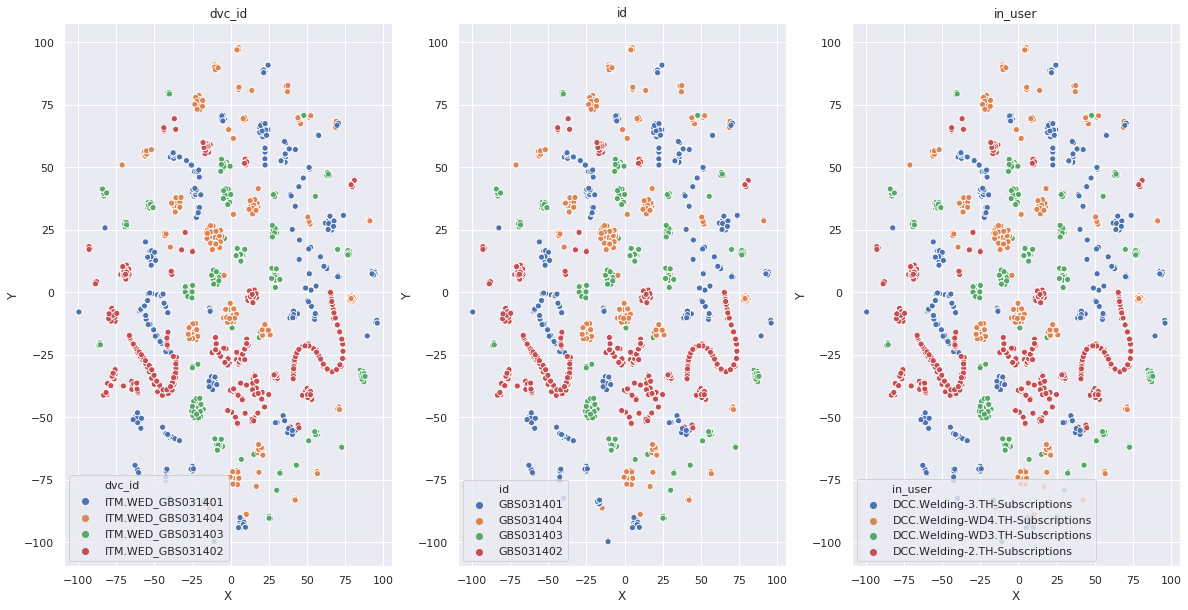

In [53]:
data = welding_df.values[:,12:23]
data_embedded = TSNE(n_components=2).fit_transform(data)
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, welding_df, left_index=True, right_index=True)

targets = ["dvc_id", "id", "in_user"]

f, axes = plt.subplots(1,3, figsize=(20, 10))
for i in range(3):
    sns.scatterplot(  y="Y", x= "X", data=embed_df,  hue=targets[i],ax=axes[i]) 
    ax = axes[i]
    ax.set_title(targets[i])

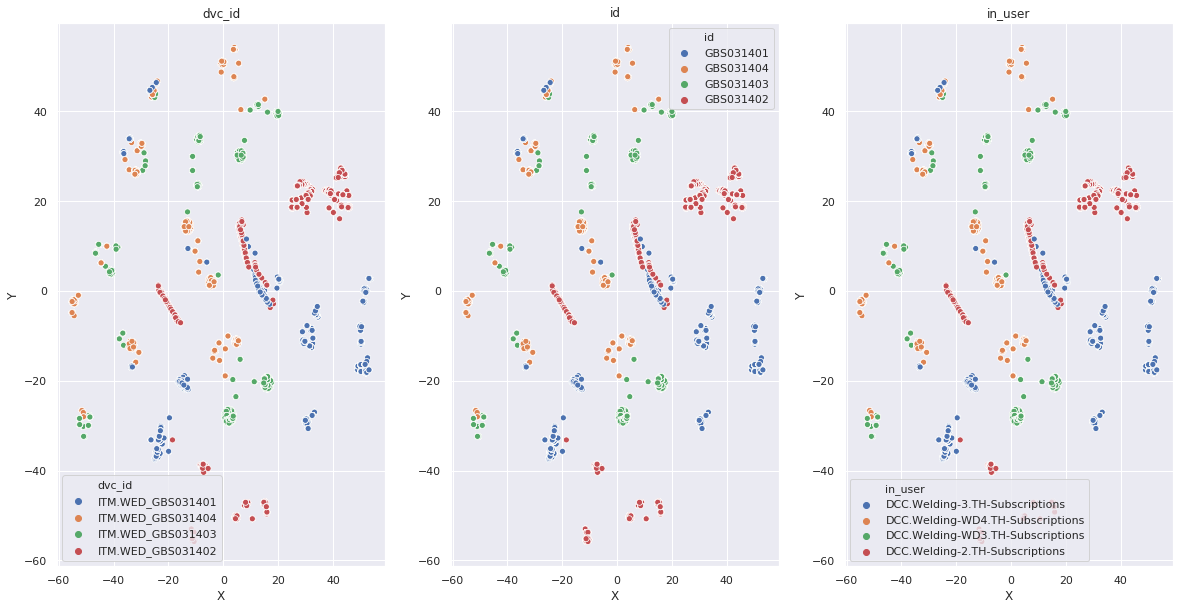

In [54]:
data = welding_df.values[:,12:23]
data_embedded = TSNE(n_components=2, perplexity=200).fit_transform(data)
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, welding_df, left_index=True, right_index=True)

targets = ["dvc_id", "id", "in_user"]

f, axes = plt.subplots(1,3, figsize=(20, 10))
for i in range(3):
    sns.scatterplot(  y="Y", x= "X", data=embed_df,  hue=targets[i],ax=axes[i]) 
    ax = axes[i]
    ax.set_title(targets[i])